<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/Gemini_UAS_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deskripsi Dataset**

Dataset Harga Rumah merupakan daftar harga rumah yang terbagi menjadi 2 data, yaitu data harga rumah daerah Jaksel dan data harga rumah daerah Tebet. Data diambil dan dikumpulkan dari beberapa website penjualan seperti rumah123.com

Dataset yang digunakan: HARGA RUMAH JAKSEL
Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1000 data. Kolom tersebut terdiri dari :

1. `HARGA` : harga dari rumah.
2. `LT` : jumlah luas tanah.
3. `LB` : jumlah luas bangunan.
4. `JKT` : jumlah kamar tidur.
5. `JKM` : jumlah kamar mandi.
6. `GRS` : garasi (ada/tidak ada)
7. `KOTA` : nama kota.

## **1. Persiapan Lingkungan dan Import Library**

In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## **2. Memuat dan Eksplorasi Data (Exploratory Data Analysis - EDA)**

### **2.1. Memuat Data**

Untuk datasetnya sudah saya download dan saya simpan di Github saya dengan link datasetnya terdapat di variabel `path`.

In [860]:
path = 'https://github.com/LatiefDataVisionary/data-science-application-college-task/raw/refs/heads/main/datasets/HARGA%20RUMAH%20JAKSEL.xlsx'

# Melewati baris pertama dan menggunakan baris kedua sebagai nama kolom
df = pd.read_excel(path, skiprows=[0], header=0)

### **2.2. Analisis Deskriptif Awal**


Tahap ini untuk melihat gambaran umum dataset seperti 5 baris pertama, informasi tipe data, dan statistik dasar.


In [861]:
display(df.head())

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [863]:
df.describe(include='all')

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001,1001
unique,NaN,NaN,NaN,NaN,NaN,2,1
top,NaN,NaN,NaN,NaN,NaN,ADA,JAKSEL
freq,NaN,NaN,NaN,NaN,NaN,779,1001
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,NaN,NaN
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,NaN,NaN
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,NaN,NaN
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,NaN,NaN
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,NaN,NaN
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,NaN,NaN


### **2.3. Penanganan Data Duplikat**


In [864]:
# cek dan hapus duplikat
duplicated_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat sebelum dihapus: {duplicated_rows}')

# menghapus baris duplicate
df.drop_duplicates(inplace=True)
print(f'Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}')
print(f'Ukuran data setelah memghapus duplikat: {df.shape}')

Jumlah baris duplikat sebelum dihapus: 70
Jumlah baris duplikat setelah dihapus: 0
Ukuran data setelah memghapus duplikat: (931, 7)


### **2.4. Menangani Nilai yang Hilang**

In [865]:
# Cek jumlah nilai yang hilang per kolom
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64


### **2.5. Melihat Distribusi Fitur Numerik dan Kategorikal**

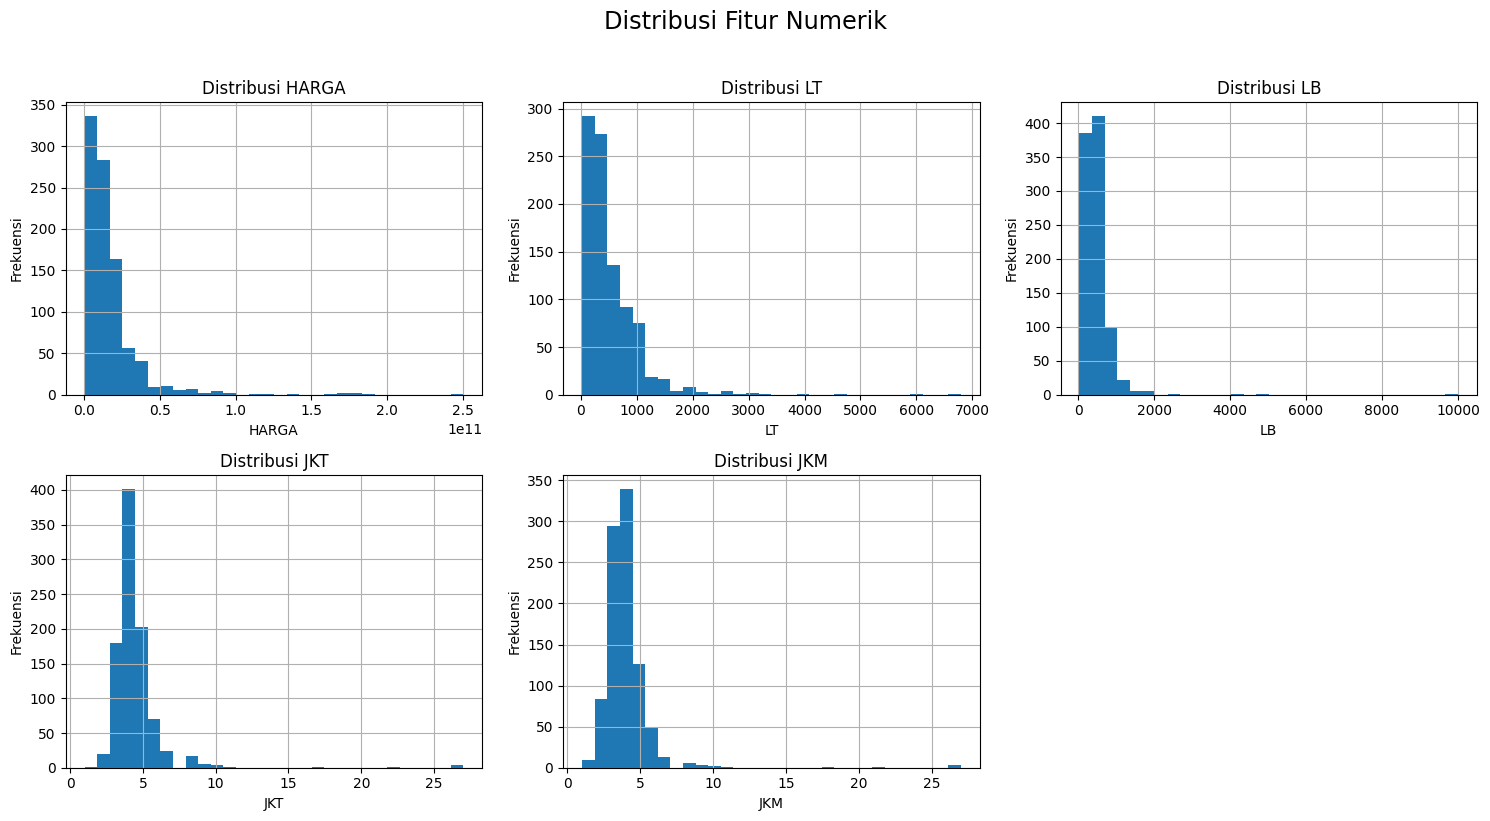

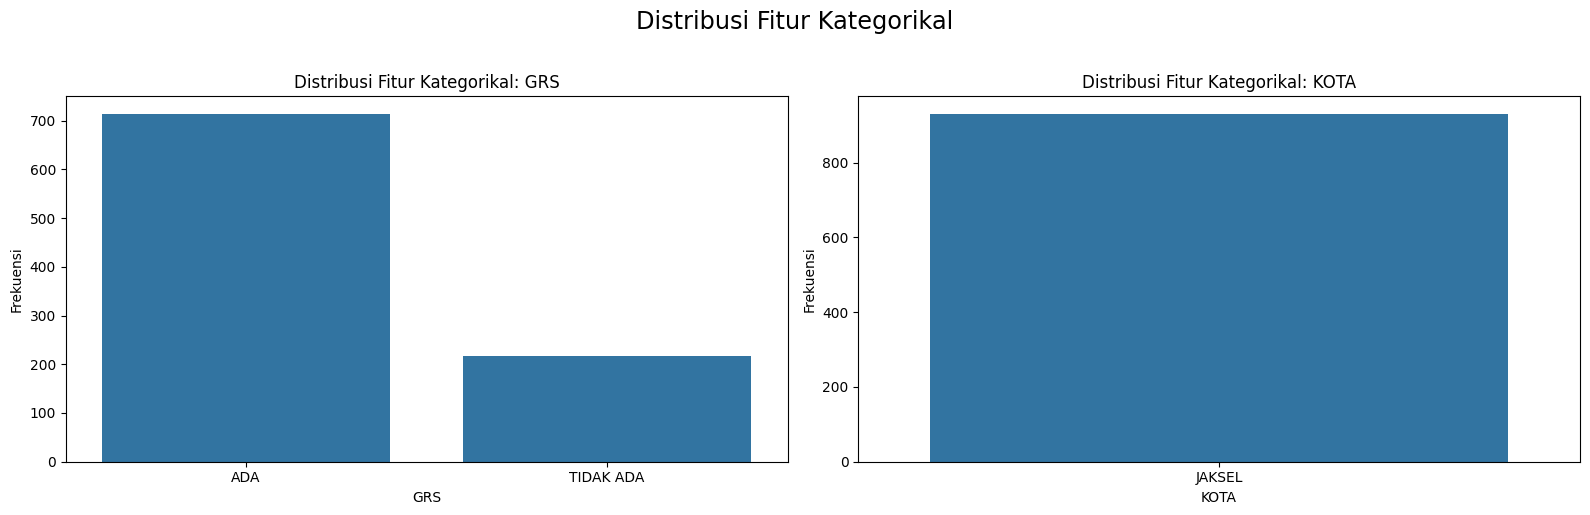

In [866]:
# Menganalisis distribusi fitur numerik (HARGA, LT, LB, JKT, JKM)
numerical_features = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']

# Hitung jumlah baris dan kolom untuk subplot
n_cols_num = 3  # Jumlah kolom subplot yang diinginkan untuk numerik
n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num # menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(5 * n_cols_num, 4 * n_rows_num))
plt.suptitle('Distribusi Fitur Numerik', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(numerical_features):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.show()


# Menganalisis distribusi fitur kategorikal (GRS, KOTA)
categorical_features = ['GRS', 'KOTA']

# menghitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Fitur Kategorikal: {col}')
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.show()

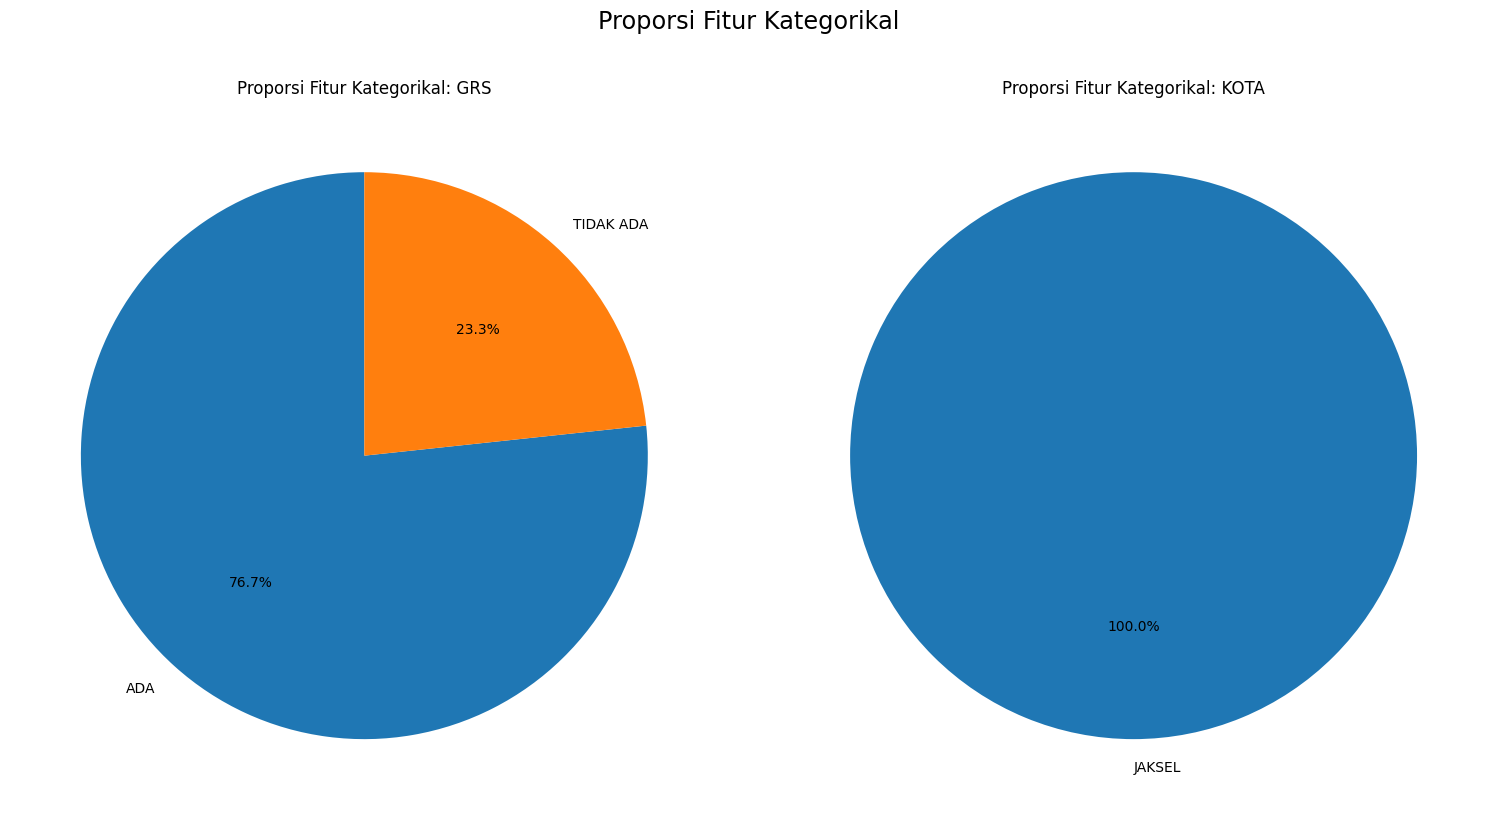

In [833]:
# Membuat pie plot untuk fitur kategorikal
categorical_features = ['GRS', 'KOTA']

# Hitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 8 * n_rows))
plt.suptitle('Proporsi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporsi Fitur Kategorikal: {col}')
    plt.ylabel('') # Menghilangkan label y default
    plt.tight_layout()

plt.show()

### **2.6. Penanganan Fitur Tidak Relevan (Zero Variance)**


Dari plot distribusi fitur `KOTA`, terlihat bahwa semua nilainya adalah "`JAKSEL`". Fitur seperti ini tidak memberikan informasi apa pun kepada model.
Kenapa Perlu Diperbaiki:
Fitur dengan varians nol (zero variance) tidak memiliki daya prediksi. Menghilangkannya akan menyederhanakan model tanpa mengurangi kualitasnya.

In [867]:
print('Nilai unik di setiap kolom (menampilkan 15 nilai unik pertama untuk efisiensi):')
for col in df.columns:
  print(f'- {col}: {df[col].nunique()} nilai unik -> {df[col].unique()[:15]}')

# Kolom 'KOTA' hanya memiliki 1 nilai unik, sehingga tidak informatif. Mari kita hapus.
df.drop(['KOTA'], axis=1, inplace=True)
print('\nUkuran data sekarang:', df.shape)

Nilai unik di setiap kolom (menampilkan 15 nilai unik pertama untuk efisiensi):
- HARGA: 266 nilai unik -> [28000000000 19000000000  4700000000  4900000000 10000000000  7600000000
  5250000000   670000000   480000000 10700000000  4200000000  8500000000
  7000000000 20000000000  9500000000]
- LT: 425 nilai unik -> [1100  824  500  251 1340  460  278  511   70   66  449  109  320  384
  462]
- LB: 241 nilai unik -> [700 800 400 300 575 350  69  42 500 188 250 645 450 285 200]
- JKT: 14 nilai unik -> [ 5  4  3  2  6  9  8  7 10 17 11  1 27 22]
- JKM: 14 nilai unik -> [ 6  4  3  5  2  1  7  8  9 18 11 21 27 10]
- GRS: 2 nilai unik -> ['ADA' 'TIDAK ADA']
- KOTA: 1 nilai unik -> ['JAKSEL']

Ukuran data sekarang: (931, 6)


### **2.7. Melihat Nilai Korelasi Antar Fitur**

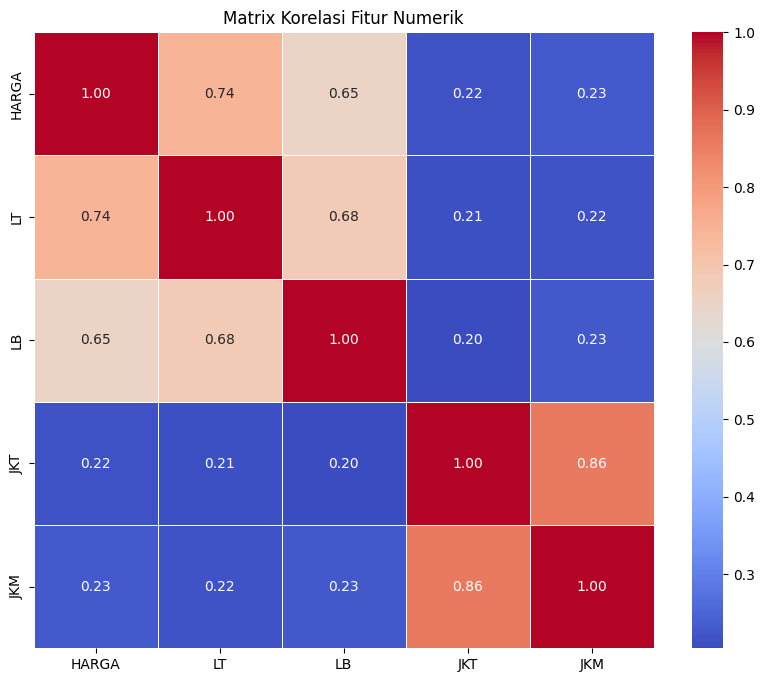

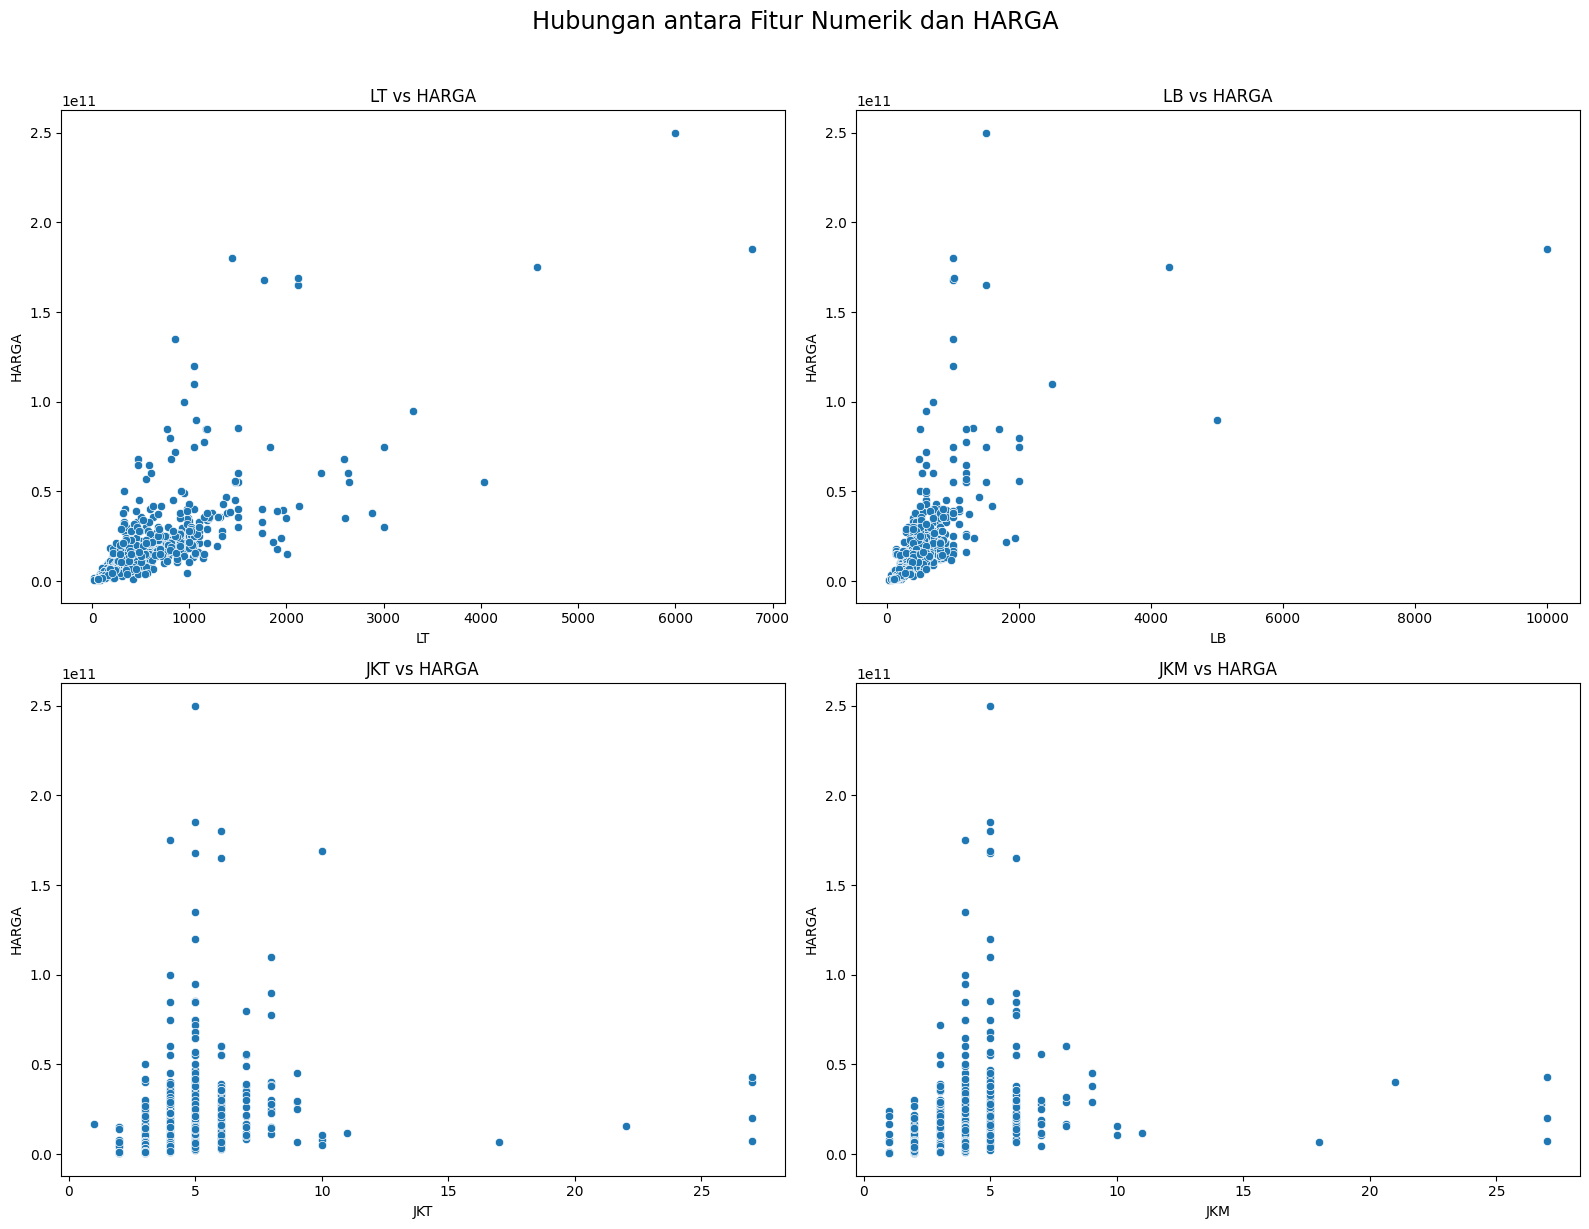

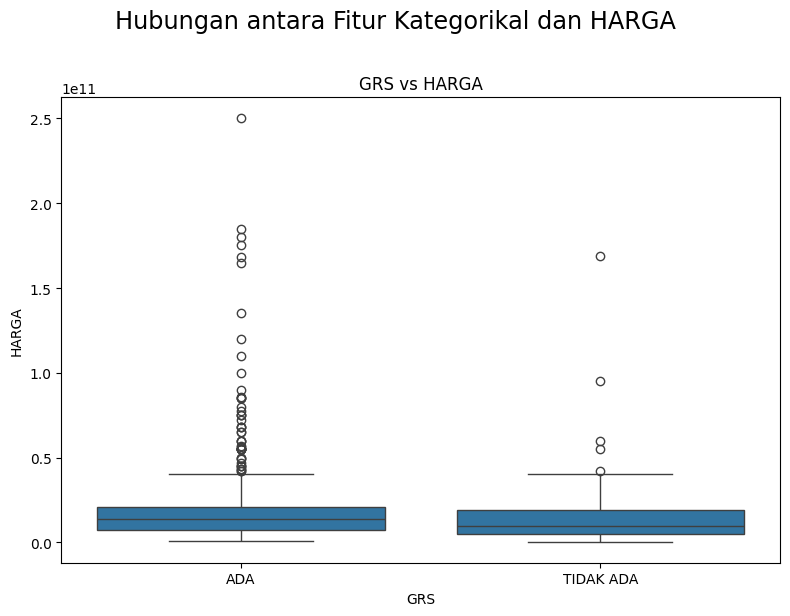

In [835]:
# Korelasi antar fitur numerik
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrix Korelasi Fitur Numerik')
plt.show()

# Scatter plot antara fitur numerik dengan HARGA
numerical_features_for_scatter = ['LT', 'LB', 'JKT', 'JKM']
n_cols_scatter = 2
n_rows_scatter = (len(numerical_features_for_scatter) + n_cols_scatter - 1) // n_cols_scatter

plt.figure(figsize=(8 * n_cols_scatter, 6 * n_rows_scatter))
plt.suptitle('Hubungan antara Fitur Numerik dan HARGA', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(numerical_features_for_scatter):
    plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
    sns.scatterplot(data=df, x=col, y='HARGA')
    plt.title(f'{col} vs HARGA')
    plt.tight_layout()

plt.show()


# Box plot atau violin plot untuk melihat hubungan fitur kategorikal dengan HARGA
categorical_features_for_box = ['GRS']
n_cols_box = 1 # Adjust to 1 as only one categorical feature remains
n_rows_box = (len(categorical_features_for_box) + n_cols_box - 1) // n_cols_box

plt.figure(figsize=(8 * n_cols_box, 6 * n_rows_box))
plt.suptitle('Hubungan antara Fitur Kategorikal dan HARGA', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features_for_box):
    plt.subplot(n_rows_box, n_cols_box, i + 1)
    sns.boxplot(data=df, x=col, y='HARGA')
    plt.title(f'{col} vs HARGA')
    plt.tight_layout()

plt.show()

### **2.8. Penanganan Outlier**

In [836]:
# # VISUALISASI OUTLIER DENGAN BOX PLOT
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.boxplot(y=df['JKT'])
# plt.title('Box Plot JKT (Kamar Tidur)')

# plt.subplot(1, 2, 2)
# sns.boxplot(y=df['JKM'])
# plt.title('Box Plot JKM (Kamar Mandi)')
# plt.tight_layout()
# plt.show()

# # PENANGANAN OUTLIER MENGGUNAKAN METODE IQR
# # Kita akan membatasi nilai yang terlalu tinggi ke batas atas (upper bound)
# print("Nilai JKT sebelum penanganan outlier:", df['JKT'].max())
# print("Nilai JKM sebelum penanganan outlier:", df['JKM'].max())

# # --- Modifikasi: Hapus 1% data teratas untuk HARGA, LT, dan LB ---
# print("\nMenghapus 1% data teratas untuk HARGA, LT, dan LB...")
# initial_shape = df.shape
# for col in ['HARGA', 'LT', 'LB']:
#     upper_bound_percentile = df[col].quantile(0.99)
#     df = df[df[col] <= upper_bound_percentile].copy() # Use .copy() to avoid SettingWithCopyWarning
#     print(f"Jumlah baris setelah menghapus 1% teratas '{col}': {df.shape[0]}")

# print(f"Jumlah baris terhapus: {initial_shape[0] - df.shape[0]}")
# print(f"Ukuran data setelah menghapus 1% teratas: {df.shape}")
# # --- Akhir Modifikasi ---


# for col in ['JKT', 'JKM']:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     # Update upper_bound calculation based on potentially smaller dataset after 1% removal
#     upper_bound = Q3 + 1.5 * IQR

#     # Cap aoutlier (mengganti nilai di atas batas atas dengan nilai batas atas)
#     # Pastikan kolom JKT dan JKM masih ada setelah penghapusan 1% data teratas
#     if col in df.columns:
#       df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
#       print(f"Batas atas untuk {col} adalah {upper_bound:.2f}. Outlier telah di-cap.")
#     else:
#       print(f"Kolom {col} tidak ditemukan setelah penghapusan 1% teratas.")


# print("\nNilai JKT setelah penanganan outlier:", df['JKT'].max() if 'JKT' in df.columns else "Kolom JKT tidak ada")
# print("\nNilai JKM setelah penanganan outlier:", df['JKM'].max() if 'JKM' in df.columns else "Kolom JKM tidak ada")

# # Note: Running this cell will modify the 'df' DataFrame in place.
# # Subsequent cells that use 'df' will use this modified version.
# # If you re-run previous cells that load or modify 'df' before this one,
# # the changes made here will be overwritten.

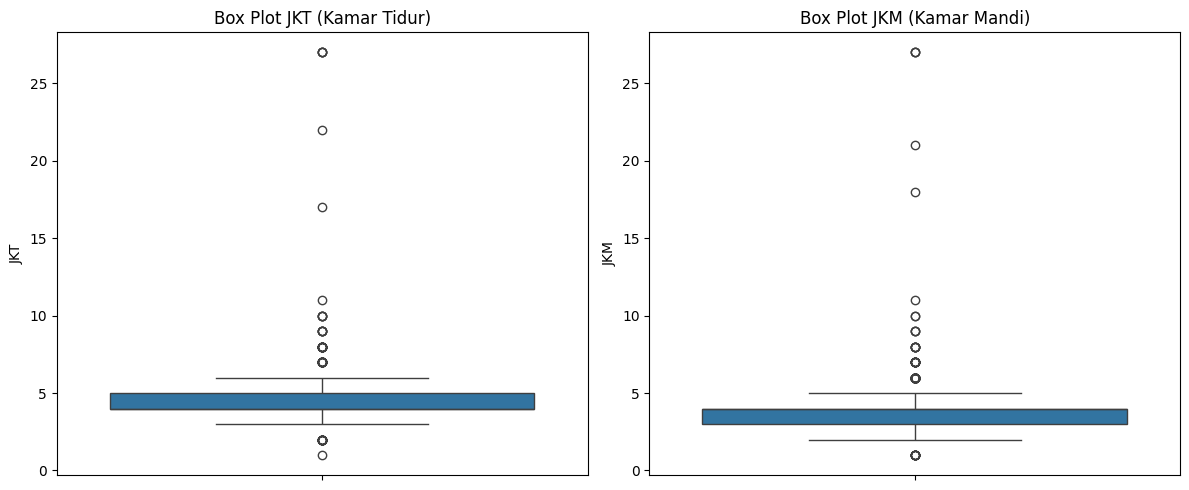

Nilai JKT sebelum penanganan outlier: 27
Nilai JKM sebelum penanganan outlier: 27
Batas atas untuk JKT adalah 6.50. Outlier telah di-cap.
Batas atas untuk JKM adalah 5.50. Outlier telah di-cap.

Nilai JKT setelah penanganan outlier: 6.5
Nilai JKM setelah penanganan outlier: 5.5


In [837]:
# VISUALISASI OUTLIER DENGAN BOX PLOT
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['JKT'])
plt.title('Box Plot JKT (Kamar Tidur)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['JKM'])
plt.title('Box Plot JKM (Kamar Mandi)')
plt.tight_layout()
plt.show()

# PENANGANAN OUTLIER MENGGUNAKAN METODE IQR
# Kita akan membatasi nilai yang terlalu tinggi ke batas atas (upper bound)
print("Nilai JKT sebelum penanganan outlier:", df['JKT'].max())
print("Nilai JKM sebelum penanganan outlier:", df['JKM'].max())

for col in ['JKT', 'JKM']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap aoutlier (mengganti nilai di atas batas atas dengan nilai batas atas)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Batas atas untuk {col} adalah {upper_bound:.2f}. Outlier telah di-cap.")

print("\nNilai JKT setelah penanganan outlier:", df['JKT'].max())
print("Nilai JKM setelah penanganan outlier:", df['JKM'].max())

### **2.9. Feature Engineering**

Tahap ini bertujuan untuk membuat fitur-fitur baru dari fitur yang sudah ada untuk meningkatkan informasi bagi model.

In [838]:
# -------------------------------------
# BLOK KODE UNTUK FEATURE ENGINEERING
# -------------------------------------

# Membuat fitur interaksi: LT * LB
df['LT_x_LB'] = df['LT'] * df['LB']
print("Menambahkan fitur LT_x_LB.")

# --- Modifikasi: Menambahkan fitur rasio dan total kamar ---
# Membuat fitur Rasio_LB_LT (menghindari pembagian dengan nol jika ada LT=0)
df['Rasio_LB_LT'] = df['LB'] / df['LT'].replace(0, np.nan) # Replace 0 with NaN to avoid division by zero
df['Rasio_LB_LT'].fillna(df['Rasio_LB_LT'].median(), inplace=True) # Fill NaN with median or other strategy
print("Menambahkan fitur Rasio_LB_LT.")

# Membuat fitur Total_Kamar
df['Total_Kamar'] = df['JKT'] + df['JKM']
print("Menambahkan fitur Total_Kamar.")
# --- Akhir Modifikasi ---


# Menerapkan transformasi logaritmik pada fitur yang miring (skewed)
# Kita tambahkan sedikit nilai (misalnya 1) sebelum log untuk menghindari log(0)
# HARGA juga ditransformasi karena merupakan target regresi
for col in ['LT', 'LB', 'LT_x_LB', 'HARGA', 'Rasio_LB_LT', 'Total_Kamar']: # Include new features for potential log transformation
    # Periksa apakah ada nilai non-positif sebelum transformasi log
    # Perhatikan bahwa kita tidak lagi memiliki baris yang merusak data numerik
    # Jadi kita tidak perlu .any().any(), cukup .any()
    if (df[col] <= 0).any():
        print(f"Kolom '{col}' mengandung nilai non-positif. Transformasi log mungkin memerlukan penyesuaian.")
        # Alternatif: terapkan log1p (log(1+x)) yang lebih aman untuk nilai kecil
        df[col + '_log'] = np.log1p(df[col])
        print(f"Menerapkan np.log1p pada kolom {col}.")
    else:
        df[col + '_log'] = np.log(df[col])
        print(f"Menerapkan np.log pada kolom {col}.")

print("\nBentuk data setelah Feature Engineering:", df.shape)
display(df.head())

Menambahkan fitur LT_x_LB.
Menambahkan fitur Rasio_LB_LT.
Menambahkan fitur Total_Kamar.
Menerapkan np.log pada kolom LT.
Menerapkan np.log pada kolom LB.
Menerapkan np.log pada kolom LT_x_LB.
Menerapkan np.log pada kolom HARGA.
Menerapkan np.log pada kolom Rasio_LB_LT.
Menerapkan np.log pada kolom Total_Kamar.

Bentuk data setelah Feature Engineering: (931, 15)


/tmp/ipython-input-838-2044641445.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rasio_LB_LT'].fillna(df['Rasio_LB_LT'].median(), inplace=True) # Fill NaN with median or other strategy


,HARGA,LT,LB,JKT,JKM,GRS,LT_x_LB,Rasio_LB_LT,Total_Kamar,LT_log,LB_log,LT_x_LB_log,HARGA_log,Rasio_LB_LT_log,Total_Kamar_log
0,28000000000,1100,700,5.0,5.5,ADA,770000,0.636364,10.5,7.003065,6.551080,13.554146,24.055470,-0.451985,2.351375
1,19000000000,824,800,4.0,4.0,ADA,659200,0.970874,8.0,6.714171,6.684612,13.398782,23.667705,-0.029559,2.079442
2,4700000000,500,400,4.0,3.0,ADA,200000,0.800000,7.0,6.214608,5.991465,12.206073,22.270828,-0.223144,1.945910
3,4900000000,251,300,5.0,4.0,ADA,75300,1.195219,9.0,5.525453,5.703782,11.229235,22.312501,0.178330,2.197225
4,28000000000,1340,575,4.0,5.0,ADA,770500,0.429104,9.0,7.200425,6.354370,13.554795,24.055470,-0.846055,2.197225


In [839]:
# # -------------------------------------
# # BLOK KODE UNTUK FEATURE ENGINEERING
# # -------------------------------------

# # Membuat fitur interaksi: LT * LB
# df['LT_x_LB'] = df['LT'] * df['LB']
# print("Menambahkan fitur LT_x_LB.")

# # Menerapkan transformasi logaritmik pada fitur yang miring (skewed)
# # Kita tambahkan sedikit nilai (misalnya 1) sebelum log untuk menghindari log(0)
# # HARGA juga ditransformasi karena merupakan target regresi
# for col in ['LT', 'LB', 'LT_x_LB', 'HARGA']:
#     # Periksa apakah ada nilai non-positif sebelum transformasi log
#     # Perhatikan bahwa kita tidak lagi memiliki baris yang merusak data numerik
#     # Jadi kita tidak perlu .any().any(), cukup .any()
#     if (df[col] <= 0).any():
#         print(f"Kolom '{col}' mengandung nilai non-positif. Transformasi log mungkin memerlukan penyesuaian.")
#         # Alternatif: terapkan log1p (log(1+x)) yang lebih aman untuk nilai kecil
#         df[col + '_log'] = np.log1p(df[col])
#         print(f"Menerapkan np.log1p pada kolom {col}.")
#     else:
#         df[col + '_log'] = np.log(df[col])
#         print(f"Menerapkan np.log pada kolom {col}.")

# print("\nBentuk data setelah Feature Engineering:", df.shape)
# display(df.head())

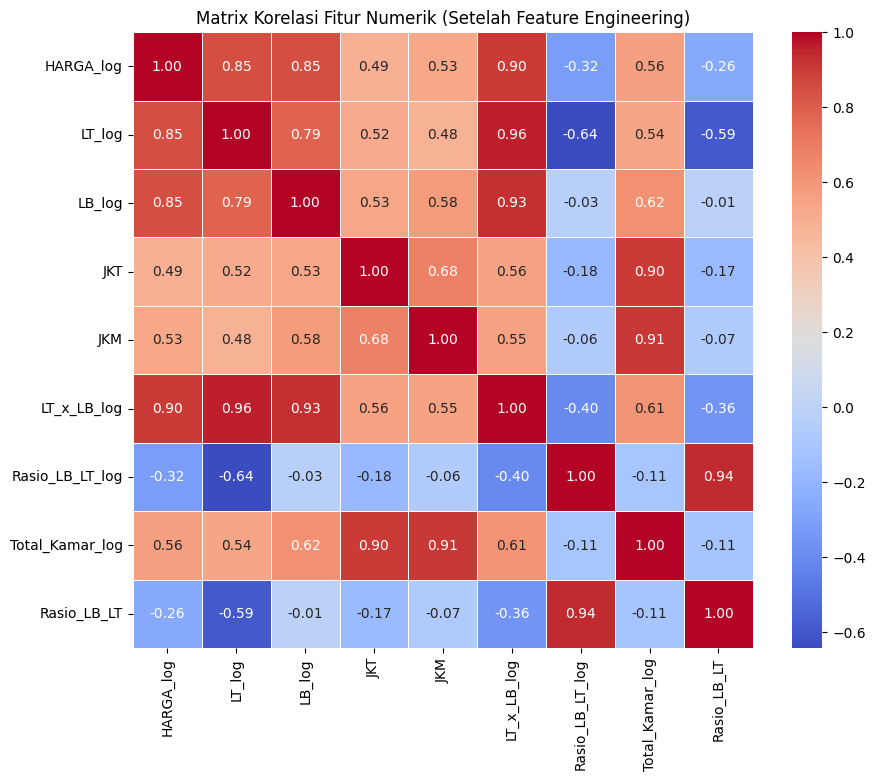

In [840]:
# Korelasi antar fitur numerik setelah feature engineering
# Identifikasi fitur numerik yang relevan setelah rekayasa fitur
numerical_features_post_fe = ['HARGA_log', 'LT_log', 'LB_log', 'JKT', 'JKM', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log', 'Rasio_LB_LT']

correlation_matrix_log = df[numerical_features_post_fe].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
plt.title('Matrix Korelasi Fitur Numerik (Setelah Feature Engineering)')
plt.show()

In [841]:
# # Korelasi antar fitur numerik setelah feature engineering
# # Identifikasi fitur numerik yang relevan setelah rekayasa fitur
# numerical_features_post_fe = ['HARGA_log', 'LT_log', 'LB_log', 'JKT', 'JKM', 'LT_x_LB_log']

# correlation_matrix_log = df[numerical_features_post_fe].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
# plt.title('Matrix Korelasi Fitur Numerik (Setelah Feature Engineering)')
# plt.show()

In [842]:
# # -------------------------------------
# # BLOK KODE UNTUK FEATURE ENGINEERING
# # -------------------------------------

# # Membuat fitur interaksi: LT * LB
# df['LT_x_LB'] = df['LT'] * df['LB']
# print("Menambahkan fitur LT_x_LB.")

# # Menerapkan transformasi logaritmik pada fitur yang miring (skewed)
# # Kita tambahkan sedikit nilai (misalnya 1) sebelum log untuk menghindari log(0)
# # HARGA juga ditransformasi karena merupakan target regresi
# for col in ['LT', 'LB', 'LT_x_LB', 'HARGA']:
#     # Periksa apakah ada nilai non-positif sebelum transformasi log
#     # Perhatikan bahwa kita tidak lagi memiliki baris yang merusak data numerik
#     # Jadi kita tidak perlu .any().any(), cukup .any()
#     if (df[col] <= 0).any():
#         print(f"Kolom '{col}' mengandung nilai non-positif. Transformasi log mungkin memerlukan penyesuaian.")
#         # Alternatif: terapkan log1p (log(1+x)) yang lebih aman untuk nilai kecil
#         df[col + '_log'] = np.log1p(df[col])
#         print(f"Menerapkan np.log1p pada kolom {col}.")
#     else:
#         df[col + '_log'] = np.log(df[col])
#         print(f"Menerapkan np.log pada kolom {col}.")

# print("\nBentuk data setelah Feature Engineering:", df.shape)
# display(df.head())

In [843]:
# # Korelasi antar fitur numerik
# # numerical_features = ['HARGA', 'LT', 'LB', 'JKT', 'JKM'] # Use the original list or create a new one
# numerical_features_for_corr = ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'LT_x_LB'] # Include the new feature LT_x_LB for correlation
# correlation_matrix = df[numerical_features_for_corr].corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
# plt.title('Matrix Korelasi Fitur Numerik (dengan LT_x_LB)')
# plt.show()

# # Scatter plot antara fitur numerik dengan HARGA
# # numerical_features_for_scatter = ['LT', 'LB', 'JKT', 'JKM'] # Use the original list or create a new one
# numerical_features_for_scatter = ['LT', 'LB', 'JKT', 'JKM', 'LT_x_LB'] # Include LT_x_LB for scatter plots
# n_cols_scatter = 2
# n_rows_scatter = (len(numerical_features_for_scatter) + n_cols_scatter - 1) // n_cols_scatter

# plt.figure(figsize=(8 * n_cols_scatter, 6 * n_rows_scatter))
# plt.suptitle('Hubungan antara Fitur Numerik dan HARGA (dengan LT_x_LB)', y=1.02, ha='center', fontsize='xx-large')

# for i, col in enumerate(numerical_features_for_scatter):
#     plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
#     sns.scatterplot(data=df, x=col, y='HARGA')
#     plt.title(f'{col} vs HARGA')
#     plt.tight_layout()

# plt.show()

## **3. Pra-pemrosesan Data**

In [844]:
# 3.1. Memisahkan Fitur (X) dan Target (y)
# Kita akan menggunakan fitur yang sudah melalui feature engineering (log-transformed, dll)
# dan membuang fitur asli yang tidak di-log untuk menghindari multikolinearitas.
# Pastikan kolom 'KOTA' sudah dihapus di langkah sebelumnya.
X = df.drop(['HARGA', 'LT', 'LB', 'LT_x_LB', 'HARGA_log'], axis=1)
y = df['HARGA_log'] # Gunakan target yang sudah di-log

# 3.2. Membuat pipeline preprocessing
# Definisikan kolom numerik dan kategorikal yang akan digunakan dalam model
# SERTAKAN fitur log baru
numerical_features_model = ['JKT', 'JKM', 'LT_log', 'LB_log', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log']
categorical_features_model = ['GRS']

# Buat transformer untuk setiap tipe kolom
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Gabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_model),
        ('cat', categorical_transformer, categorical_features_model)
    ],
    remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
)

print("Preprocessor berhasil dibuat.")
print("Fitur yang digunakan untuk model:", list(X.columns))

Preprocessor berhasil dibuat.
Fitur yang digunakan untuk model: ['JKT', 'JKM', 'GRS', 'Rasio_LB_LT', 'Total_Kamar', 'LT_log', 'LB_log', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log']


In [845]:
# # 3.1. Memisahkan Fitur (X) dan Target (y)
# # Kita akan menggunakan fitur yang sudah melalui feature engineering (log-transformed, dll)
# # dan membuang fitur asli yang tidak di-log untuk menghindari multikolinearitas.
# X = df.drop(['HARGA', 'LT', 'LB', 'LT_x_LB', 'HARGA_log'], axis=1)
# y = df['HARGA_log'] # Gunakan target yang sudah di-log

# # 3.2. Membuat pipeline preprocessing
# # Definisikan kolom numerik dan kategorikal yang akan digunakan dalam model
# numerical_features_model = ['JKT', 'JKM', 'LT_log', 'LB_log', 'LT_x_LB_log']
# categorical_features_model = ['GRS']

# # Buat transformer untuk setiap tipe kolom
# numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Gabungkan transformer menggunakan ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_features_model),
#         ('cat', categorical_transformer, categorical_features_model)
#     ],
#     remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
# )

# print("Preprocessor berhasil dibuat.")
# print("Fitur yang digunakan untuk model:", list(X.columns))

## **4. Pemisahan Fitur dan Target, Serta Data Latih & Uji**

In [846]:
# 4.1. Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4.2. Menampilkan ukuran dari setiap set data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (651, 10)
Ukuran X_test: (280, 10)
Ukuran y_train: (651,)
Ukuran y_test: (280,)


## **5. Pemodelan, Pelatihan, dan Evaluasi**


### **5.1. Model 1: Regresi Linear Sederhana**


In [847]:
# Menggunakan fitur 'LT_x_LB_log' yang sudah ditransformasi log
X_train_simple = X_train[['LT_x_LB_log']]
X_test_simple = X_test[['LT_x_LB_log']]

# Membuat pipeline khusus untuk regresi sederhana (hanya scaling pada fitur tunggal)
simple_lr_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                     ('regressor', LinearRegression())])

# Melatih model
simple_lr_pipeline.fit(X_train_simple, y_train)

# Membuat prediksi
y_pred_log_slr = simple_lr_pipeline.predict(X_test_simple)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# PASTIKAN y_test_actual dihitung ulang berdasarkan y_test saat ini
y_test_actual = np.exp(y_test)
y_pred_actual_slr = np.exp(y_pred_log_slr)

# Evaluasi model
r2_slr = r2_score(y_test, y_pred_log_slr)
mae_slr = mean_absolute_error(y_test_actual, y_pred_actual_slr)

print("--- Hasil Evaluasi Regresi Linier Sederhana ---")
print(f"Fitur yang digunakan: LT_x_LB_log")
print(f"R-Squared (R²) (Log Scale): {r2_slr:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_slr:,.0f}")

--- Hasil Evaluasi Regresi Linier Sederhana ---
Fitur yang digunakan: LT_x_LB_log
R-Squared (R²) (Log Scale): 0.8035
Mean Absolute Error (MAE) (Actual Scale): Rp 7,620,516,963


In [848]:
# # 5.1.1. Regresi Linier Sederhana
# # Menggunakan fitur 'LT_x_LB_log' yang sudah ditransformasi log
# X_train_simple = X_train[['LT_x_LB_log']]
# X_test_simple = X_test[['LT_x_LB_log']]

# # Membuat pipeline khusus untuk regresi sederhana (hanya scaling pada fitur tunggal)
# simple_lr_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
#                                      ('regressor', LinearRegression())])

# # Melatih model
# simple_lr_pipeline.fit(X_train_simple, y_train)

# # Membuat prediksi
# y_pred_log_slr = simple_lr_pipeline.predict(X_test_simple)

# # Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# # Pastikan y_test_actual sudah didefinisikan
# if 'y_test_actual' not in locals():
#     y_test_actual = np.exp(y_test)
# y_pred_actual_slr = np.exp(y_pred_log_slr)

# # Evaluasi model
# r2_slr = r2_score(y_test, y_pred_log_slr)
# mae_slr = mean_absolute_error(y_test_actual, y_pred_actual_slr)

# print("--- Hasil Evaluasi Regresi Linier Sederhana ---")
# print(f"Fitur yang digunakan: LT_x_LB_log")
# print(f"R-Squared (R²) (Log Scale): {r2_slr:.4f}")
# print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_slr:,.0f}")

### **5.2. Model 2: Regresi Linear Berganda**


In [849]:
# Menggunakan semua fitur yang telah diproses oleh preprocessor_updated (termasuk fitur polinomial dan one-hot encoding)

# Membuat pipeline untuk Regresi Linier Berganda
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
multi_lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                                    ('regressor', LinearRegression())])

# Melatih model
multi_lr_pipeline.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_log_mlr = multi_lr_pipeline.predict(X_test)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_mlr = np.exp(y_pred_log_mlr)

# Evaluasi model
r2_mlr = r2_score(y_test, y_pred_log_mlr)
mae_mlr = mean_absolute_error(y_test_actual, y_pred_actual_mlr)

print("--- Hasil Evaluasi Regresi Linier Berganda ---")
print(f"R-Squared (R²) (Log Scale): {r2_mlr:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_mlr:,.0f}")

--- Hasil Evaluasi Regresi Linier Berganda ---
R-Squared (R²) (Log Scale): 0.8215
Mean Absolute Error (MAE) (Actual Scale): Rp 6,889,826,292


In [850]:
# # Menggunakan semua fitur yang telah diproses oleh preprocessor_updated (termasuk fitur polinomial dan one-hot encoding)

# # Membuat pipeline untuk Regresi Linier Berganda
# # Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
# multi_lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                     ('regressor', LinearRegression())])

# # Melatih model
# multi_lr_pipeline.fit(X_train, y_train)

# # Membuat prediksi pada data uji
# y_pred_log_mlr = multi_lr_pipeline.predict(X_test)

# # Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# # Pastikan y_test_actual sudah didefinisikan
# if 'y_test_actual' not in locals():
#     y_test_actual = np.exp(y_test)
# y_pred_actual_mlr = np.exp(y_pred_log_mlr)

# # Evaluasi model
# r2_mlr = r2_score(y_test, y_pred_log_mlr)
# mae_mlr = mean_absolute_error(y_test_actual, y_pred_actual_mlr)

# print("--- Hasil Evaluasi Regresi Linier Berganda ---")
# print(f"R-Squared (R²) (Log Scale): {r2_mlr:.4f}")
# print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_mlr:,.0f}")

### **5.3. Model 3: Decision Tree Regressor**


In [851]:
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                              ('regressor', DecisionTreeRegressor(random_state=42))]) # Use default params here for grid search

# Menyetel hyperparameter untuk Decision Tree
print("\n--- Tuning Hyperparameter Decision Tree ---")
# Tentukan parameter grid yang lebih luas
# param_grid_dt = {
#     'regressor__max_depth': [None, 5, 10, 15, 20],
#     'regressor__min_samples_split': [2, 5, 10, 15],
#     'regressor__min_samples_leaf': [1, 2, 4, 8],
#     'regressor__max_features': [None, 'sqrt', 'log2'] # Add max_features
# }

param_grid_dt = {
    'regressor__max_depth': [5],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [8],
    'regressor__max_features': [None],
    'regressor__splitter': ['random'],
    'regressor__ccp_alpha': [0.0]
}


'''
Best hyperparameters for Decision Tree: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2, 'regressor__splitter': 'random'}
0.783062
'''

# Gunakan GridSearchCV dengan cross-validation
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Ambil model terbaik
best_dt_pipeline = grid_search_dt.best_estimator_
print(f"Best hyperparameters for Decision Tree: {grid_search_dt.best_params_}")

# 5.2.3. Membuat prediksi pada data uji menggunakan model terbaik
y_pred_log_dt = best_dt_pipeline.predict(X_test)

# 5.2.4. Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_dt = np.exp(y_pred_log_dt)

# 5.2.5. Evaluasi model terbaik
r2_dt = r2_score(y_test, y_pred_log_dt)
mae_dt = mean_absolute_error(y_test_actual, y_pred_actual_dt)

print("\n--- Hasil Evaluasi Decision Tree (Tuned) ---")
print(f"R-Squared (R²) (Log Scale): {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_dt:,.0f}")


--- Tuning Hyperparameter Decision Tree ---
Best hyperparameters for Decision Tree: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2, 'regressor__splitter': 'random'}

--- Hasil Evaluasi Decision Tree (Tuned) ---
R-Squared (R²) (Log Scale): 0.7880
Mean Absolute Error (MAE) (Actual Scale): Rp 7,680,728,609


In [852]:
# # Import model
# from sklearn.tree import DecisionTreeRegressor
# # Removed GridSearchCV as per user request

# # 5.2.1. Membuat pipeline untuk Decision Tree
# # Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
# # Menggunakan parameter default atau disesuaikan secara manual (tanpa GridSearchCV)
# dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated), # Use preprocessor_updated
#                               ('regressor', DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_split=10, min_samples_leaf=5, max_features='sqrt'))]) # Example: manually setting more parameters

# # Melatih model
# dt_pipeline.fit(X_train, y_train)

# # Membuat prediksi pada data uji
# y_pred_log_dt = dt_pipeline.predict(X_test)

# # 5.2.4. Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# # Pastikan y_test_actual sudah didefinisikan
# if 'y_test_actual' not in locals():
#     y_test_actual = np.exp(y_test)
# y_pred_actual_dt = np.exp(y_pred_log_dt)

# # 5.2.5. Evaluasi model
# r2_dt = r2_score(y_test, y_pred_log_dt)
# mae_dt = mean_absolute_error(y_test_actual, y_pred_actual_dt)

# print("\n--- Hasil Evaluasi Decision Tree ---")
# print(f"R-Squared (R²) (Log Scale): {r2_dt:.4f}")
# print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_dt:,.0f}")

In [853]:
# # Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
# dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated), # Use preprocessor_updated
#                               ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10))]) # Example: manually setting max_depth

# # Melatih model
# dt_pipeline.fit(X_train, y_train)

# # Membuat prediksi pada data uji
# y_pred_log_dt = dt_pipeline.predict(X_test)

# # 5.2.4. Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# # Pastikan y_test_actual sudah didefinisikan
# if 'y_test_actual' not in locals():
#     y_test_actual = np.exp(y_test)
# y_pred_actual_dt = np.exp(y_pred_log_dt)

# # 5.2.5. Evaluasi model
# r2_dt = r2_score(y_test, y_pred_log_dt)
# mae_dt = mean_absolute_error(y_test_actual, y_pred_actual_dt)

# print("\n--- Hasil Evaluasi Decision Tree ---")
# print(f"R-Squared (R²) (Log Scale): {r2_dt:.4f}")
# print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_dt:,.0f}")

### **5.4. Model 4: Random Forest Regressor**


In [854]:
# Import model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# 5.3.1. Membuat pipeline untuk Random Forest
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                              ('regressor', RandomForestRegressor(random_state=42))]) # Remove n_estimators here for tuning

# Menyetel hyperparameter untuk Random Forest
print("\n--- Tuning Hyperparameter Random Forest ---")
# Tentukan parameter grid yang lebih luas berdasarkan analisis sebelumnya dan eksplorasi tambahan
# param_grid_rf = {
#     'regressor__n_estimators': [100, 200, 300, 400], # More estimators
#     'regressor__max_depth': [5, 10, 15, 20, None], # Explore more depths
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__max_features': [None, 'sqrt', 'log2', 0.8] # Add max_features
# }

param_grid_rf = {
    'regressor__n_estimators': [100], # More estimators
    'regressor__max_depth': [5], # Explore more depths
    'regressor__min_samples_split': [10],
    'regressor__min_samples_leaf': [4],
    'regressor__max_features': ['sqrt'],
    # 'regressor__bootstrap' : [True, False],
    # 'regressor__ccp_alpha': [0.0, 0.001] # Tambahkan ini jika ingin mencoba pruning
}

'''
Best hyperparameters for Random Forest: {'regressor__max_depth': 5, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
0.8124
'''

# Gunakan GridSearchCV dengan cross-validation
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Ambil model terbaik
best_rf_pipeline = grid_search_rf.best_estimator_
print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# 5.3.3. Membuat prediksi pada data uji menggunakan model terbaik
y_pred_log_rf = best_rf_pipeline.predict(X_test)

# 5.3.4. Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_rf = np.exp(y_pred_log_rf)

# 5.3.5. Evaluasi model terbaik
r2_rf = r2_score(y_test, y_pred_log_rf)
mae_rf = mean_absolute_error(y_test_actual, y_pred_actual_rf)

print("\n--- Hasil Evaluasi Random Forest (Tuned) ---")
print(f"R-Squared (R²) (Log Scale): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_rf:,.0f}")


--- Tuning Hyperparameter Random Forest ---
Best hyperparameters for Random Forest: {'regressor__max_depth': 5, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}

--- Hasil Evaluasi Random Forest (Tuned) ---
R-Squared (R²) (Log Scale): 0.8124
Mean Absolute Error (MAE) (Actual Scale): Rp 7,063,329,981


In [855]:
# # Membuat pipeline untuk Random Forest
# rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                               ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))])

# # Melatih model
# rf_pipeline.fit(X_train, y_train)

# # Membuat prediksi pada data uji
# y_pred_log_rf = rf_pipeline.predict(X_test)

# # Mengembalikan prediksi ke skala asli
# y_pred_actual_rf = np.exp(y_pred_log_rf)

# # Evaluasi model
# r2_rf = r2_score(y_test, y_pred_log_rf)
# mae_rf = mean_absolute_error(y_test_actual, y_pred_actual_rf)

# print("--- Hasil Evaluasi Random Forest ---")
# print(f"R-Squared (R²): {r2_rf:.4f}")
# print(f"Mean Absolute Error (MAE): Rp {mae_rf:,.0f}")

## **6. Ringkasan Hasil Evaluasi Model**


In [856]:
# Ensure y_test_actual is defined
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)

# Use the correct variable names after modifications
results = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest'], # Updated names
    'R-Squared (Log Scale)': [r2_slr, r2_mlr, r2_dt, r2_rf], # Use log scale R2 for primary comparison
    'Mean Absolute Error (MAE) (Actual Scale)': [mae_slr, mae_mlr, mae_dt, mae_rf] # Use actual scale MAE
})

# 6.2. Mengurutkan hasil berdasarkan R-Squared (Log Scale) dari tertinggi ke terendah
results = results.sort_values(by='R-Squared (Log Scale)', ascending=False).reset_index(drop=True)

# 6.3. Menampilkan tabel perbandingan
print("--- Tabel Perbandingan Kinerja Model (Diperbarui) ---")
display(results)

--- Tabel Perbandingan Kinerja Model (Diperbarui) ---


,Model,R-Squared (Log Scale),Mean Absolute Error (MAE) (Actual Scale)
0,Multiple Linear Regression,0.821468,6.889826e+09
1,Random Forest,0.812354,7.063330e+09
2,Simple Linear Regression,0.803529,7.620517e+09
3,Decision Tree,0.787971,7.680729e+09


In [857]:
# # 6.1. Membuat DataFrame untuk perbandingan (diperbarui)
# import pandas as pd

# results = pd.DataFrame({
#     'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest'],
#     'R-Squared': [r2_slr, r2_mlr, r2_dt, r2_rf],
#     'Mean Absolute Error (MAE)': [mae_slr, mae_mlr, mae_dt, mae_rf]
# })

# # 6.2. Mengurutkan hasil berdasarkan R-Squared (dari tertinggi ke terendah)
# results = results.sort_values(by='R-Squared', ascending=False).reset_index(drop=True)

# # 6.3. Menampilkan tabel perbandingan
# print("--- Tabel Perbandingan Kinerja Model (Diperbarui) ---")
# display(results)

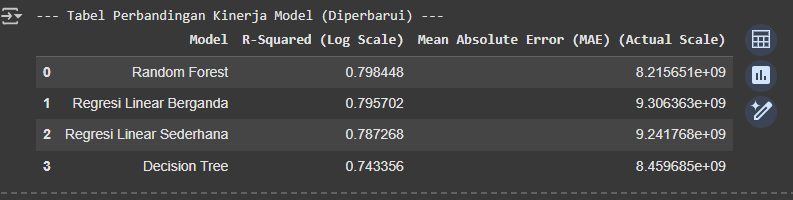

In [858]:
# # Import necessary regression models
# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures

# # Update the preprocessor to include the new polynomial features and exclude the old log features
# # Identify the numerical features that are actually in the X_train DataFrame
# # We will apply polynomial features to the log-transformed area features
# numerical_features_for_poly = ['LT_log', 'LB_log', 'LT_x_LB_log']
# # SERTAKAN fitur log baru di sini untuk scaling
# numerical_features_other_num = ['JKT', 'JKM', 'Rasio_LB_LT_log', 'Total_Kamar_log'] # Other numerical features to scale
# categorical_features_model = ['GRS'] # GRS is still the only categorical feature

# # Create transformers
# poly_transformer = PolynomialFeatures(degree=2, include_bias=False) # Add polynomial features
# scaler = StandardScaler() # Scaler for all numerical features

# # Create the preprocessor with polynomial features and scaling
# preprocessor_updated = ColumnTransformer(
#     transformers=[
#         ('poly', poly_transformer, numerical_features_for_poly), # Apply polynomial features to specific columns
#         ('scale', scaler, numerical_features_other_num), # Scale other numerical features
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_model) # One-hot encode categorical
#     ],
#     remainder='passthrough' # Keep other columns if any (there shouldn't be any after this)
# )


# # Create pipelines for each model
# # Ridge and Lasso, ElasticNet will use the updated preprocessor
# ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                  ('regressor', Ridge(random_state=42))])

# lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                  ('regressor', Lasso(random_state=42))])

# elasticnet_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                       ('regressor', ElasticNet(random_state=42))])

# # XGBoost and LightGBM will also use the updated preprocessor (scaling might not be strictly necessary for tree models, but consistent preprocessing is good practice)
# xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                ('regressor', XGBRegressor(random_state=42))])

# lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                ('regressor', LGBMRegressor(random_state=42))])


# # Store results in dictionaries
# model_results_log = {}
# model_results_actual = {}

# models = {
#     'Ridge': ridge_pipeline,
#     'Lasso': lasso_pipeline,
#     'ElasticNet': elasticnet_pipeline,
#     'XGBoost': xgb_pipeline,
#     'LightGBM': lgbm_pipeline
# }

# # Define y_test_actual if it's not already defined from previous cells
# if 'y_test_actual' not in locals():
#     y_test_actual = np.exp(y_test)

# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions (log scale)
#     y_pred_log = model.predict(X_test)

#     # Evaluate on log scale (primarily R-squared for model comparison)
#     r2_log = r2_score(y_test, y_pred_log)
#     model_results_log[name] = {'R-Squared (log)': r2_log}

#     # Convert predictions back to original scale
#     y_pred_actual = np.exp(y_pred_log)

#     # Evaluate on original scale (MAE is more interpretable here)
#     r2_actual = r2_score(y_test_actual, y_pred_actual) # Calculate R2 on actual scale for completeness
#     mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
#     model_results_actual[name] = {'R-Squared (Actual Scale)': r2_actual,
#                                   'Mean Absolute Error (MAE)': mae_actual}

#     print(f"--- Hasil Evaluasi {name} ---")
#     print(f"R-Squared (R²) on Log Scale: {r2_log:.4f}")
#     print(f"R-Squared (R²) on Actual Scale: {r2_actual:.4f}")
#     print(f"Mean Absolute Error (MAE) on Actual Scale: Rp {mae_actual:,.0f}")

# # Display summary table for comparison
# results_df_log = pd.DataFrame(model_results_log).T.sort_values(by='R-Squared (log)', ascending=False)
# results_df_actual = pd.DataFrame(model_results_actual).T.sort_values(by='Mean Absolute Error (MAE)')


# print("\n--- Tabel Perbandingan Kinerja Model (Log Scale R-Squared) ---")
# display(results_df_log)

# print("\n--- Tabel Perbandingan Kinerja Model (Actual Scale R-Squared and MAE) ---")
# display(results_df_actual)